# MOwNiT
## Julia Smerdel
### Laboratorium 1, Zadanie 1







Program do obliczania iloczynu skalarnego wektorów.

In [4]:
#pierwsze wywołanie z czasem kompilacji
using LinearAlgebra
function compilationTime()
    vec1 = rand(10);
    vec2 = rand(10)
    dot(vec1, vec2)
    

    matrix = rand(10,10);
    vector = rand(10);
    *(matrix, vector);
end

compilationTime()

10-element Vector{Float64}:
 1.5551507943637988
 2.141900302113945
 2.382320209578914
 2.289004090022937
 3.1947615369612135
 3.5773893784879647
 2.505242955681791
 2.6342009313070536
 1.7493765531823482
 2.194590098672639

In [5]:

function dotVector(vecSize, df)
    
    for i in 1:10
        vec1 = rand(vecSize);
        vec2 = rand(vecSize)
        push!(df, ("dotOperation", vecSize, @elapsed dot(vec1, vec2)))
    end
    
        
end

    

dotVector (generic function with 1 method)

Program do mnożenia macierzy kwadratowej przez wektor z użyciem operatora *.


In [6]:
function matrixVector(size, df)    

    for i in 1:10
        matrix = rand(size, size);
        vector = rand(size);
        push!(df, ("matrixOperation", size, @elapsed *(matrix, vector)))
    end
    
end

matrixVector (generic function with 1 method)

Przypisanie danych do pliku CSV.

In [38]:
using CSV
using DataFrames
matrixSizes = [x for x in 500:500:20000];
dotSizes = [x for x in 500000:500000:15000000];
df = DataFrame(Type=String[], Size=Int[], Time=Float64[]);

for i in dotSizes
    dotVector(i, df);
end
for i in matrixSizes
    matrixVector(i, df);
end

CSV.write("results.csv", df)


"results.csv"

Wczytanie danych z pliku CSV

In [39]:
using CSV
using Statistics
input = "results.csv";
mydata = CSV.read(input, delim=",", DataFrame)
stats = combine(groupby(mydata, [:Type, :Size]), "Time" => mean, "Time" => std)

Row,Type,Size,Time_mean,Time_std
,String15,Int64,Float64,Float64
1,dotOperation,500000,0.00071675,6.06578e-5
2,dotOperation,1000000,0.00138444,0.00013127
3,dotOperation,1500000,0.00191857,9.58489e-5
4,dotOperation,2000000,0.00251218,6.80958e-5
5,dotOperation,2500000,0.00316151,0.000153834
6,dotOperation,3000000,0.00372203,9.58594e-5
7,dotOperation,3500000,0.00534315,0.00199227
8,dotOperation,4000000,0.00707728,0.00287543
9,dotOperation,4500000,0.00552887,0.000221866


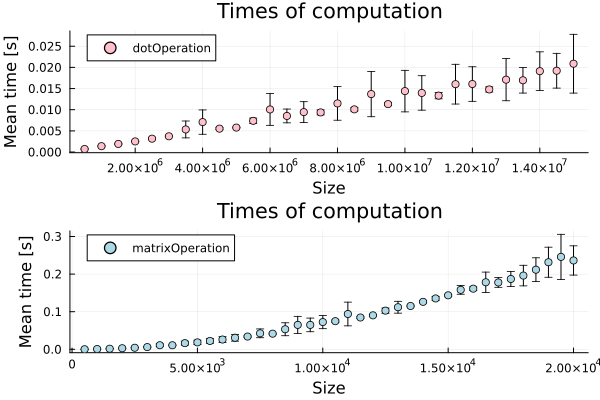

In [40]:
using Plots
scatter(stats.Size, stats.Time_mean, group = stats.Type, yerr = stats.Time_std, xlabel = "Size", ylabel = "Mean time [s]", title="Times of computation", layout=(2, 1), colour=[:pink :lightblue])